<h1>Car Brand Recognition Project</h1>

<h5>The "Car Brand Recognition Project" is a machine learning initiative aimed at identifying car brands from images using a neural network. The project focuses on recognizing specific brands and models, including Audi, Hyundai Creta, Mahindra Scorpio, Rolls Royce, Swift, Tata Safari, and Toyota Innova.
<br>
<br>
By leveraging a deep learning-based image classification model, the system is trained on a labeled dataset of car images to accurately classify these brands and models. This project has potential applications in traffic monitoring, automated parking systems, and car dealership analytics.
<br>
<br>
The neural network will be designed and trained using state-of-the-art frameworks like TensorFlow or PyTorch, utilizing techniques such as convolutional neural networks (CNNs) to extract features and ensure high accuracy in brand recognition.
</h5>

<h3>Importing Important Python Libraries</h3>

In [1]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import datasets, layers, models
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

from PIL import Image, ImageOps 
from IPython.display import display

<h3>Assigning The directories</h3>

In [2]:
img_dir1 = 'train'
img_dir2 = "test"
batch_size = 64
img_size = 150
input_shape = (150, 150, 1)

<h3>Importing The Dataset</h3>

In [3]:
data_gen = ImageDataGenerator(rescale = 1/255, validation_split=0.2)
data_gen_test = ImageDataGenerator(rescale=1/255)
     
train_data = data_gen.flow_from_directory(img_dir1, target_size=(img_size, img_size),subset="training", color_mode="grayscale", shuffle=True, class_mode="binary")
val_data = data_gen.flow_from_directory(img_dir1, target_size=(img_size, img_size),subset="validation", color_mode="grayscale", shuffle=True, class_mode="binary")
test_data = data_gen_test.flow_from_directory(img_dir2, target_size=(img_size, img_size), color_mode="grayscale", shuffle=False, batch_size=batch_size, class_mode="binary")

Found 2684 images belonging to 7 classes.
Found 668 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


In [4]:
labels = train_data.class_indices
classes = list(labels.keys())
classes

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

<h3>Make the Convolutional Nueral Network</h3>

In [5]:
model = Sequential()
model.add(keras.layers.InputLayer(shape=input_shape))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [6]:
# cnn = models.Sequential([
#     layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
    
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

<h3>Compiling the Nueral Network</h3>

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,874 (9.39 MB)

 Trainable params: 2,460,874 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

<h3>Compiling the Nueral Network</h3>

In [9]:
with tf.device("/device:GPU:0"):
    his = model.fit(train_data, epochs=10, validation_data=val_data, verbose=1)

C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 31s 338ms/step - accuracy: 0.2186 - loss: 2.0499 - val_accuracy: 0.3263 - val_loss: 1.7740
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 31s 363ms/step - accuracy: 0.3683 - loss: 1.7176 - val_accuracy: 0.4536 - val_loss: 1.5503
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 472ms/step - accuracy: 0.4881 - loss: 1.3928 - val_accuracy: 0.5374 - val_loss: 1.3324
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 491ms/step - accuracy: 0.6230 - loss: 1.0591 - val_accuracy: 0.6018 - val_loss: 1.2392
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 39s 467ms/step - accuracy: 0.7314 - loss: 0.7759 - val_accuracy: 0.6452 - val_loss: 1.1922
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 42s 498ms/step - accuracy: 0.8051 - loss: 0.5864 - val_accuracy: 0.6527 - val_loss: 1.1521
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 43s 506ms/step - accuracy: 0.8606 - loss: 0.3821 - val_accuracy: 0.6452 - val_loss: 1.2418
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 486ms/step - accuracy: 0.9182 - loss: 0.2584 - val_accu

<h3>Evaluating the Model</h3>

In [10]:
train_loss, train_acc = model.evaluate(train_data)
test_loss, test_acc = model.evaluate(train_data)
print(f"Train data loss is {train_loss}, Train data Accuracy {train_acc}, Test data loss is {test_loss}, Test data Accuracy is {test_acc}")

84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.9909 - loss: 0.0401
84/84 ━━━━━━━━━━━━━━━━━━━━ 13s 155ms/step - accuracy: 0.9937 - loss: 0.0351
Train data loss is 0.03867776319384575, Train data Accuracy 0.9910581111907959, Test data loss is 0.038677774369716644, Test data Accuracy is 0.9910581111907959


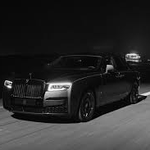

In [11]:
data = np.ndarray(shape=(1, 150, 150, 1), dtype=np.float32)
image = Image.open("144.jpg")
size = (150, 150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
image_array = np.array(image)
display(image)

In [13]:
data = image_array.reshape((-1, 150, 150, 1))
prediction = model.predict(data)
print("Model Prediction :", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Model Prediction : 1.0


<h3>Plotting Graph of Training and validation accuracy and loss</h3>

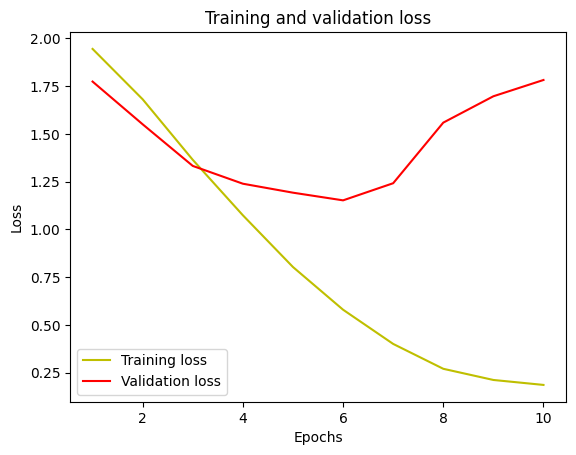

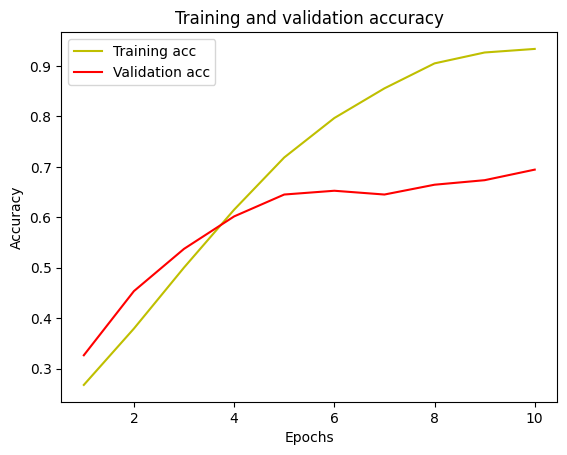

In [12]:
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = his.history['accuracy']
val_acc = his.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()